
# TP1: vision_computadora_I (21Co2025)

# Integrantes

1. Sebastian Biagiola
2. Erlin Rey
3. Santiago Casado
5. Daniel Bazán
6. Jonathan Matias Borda

Parte 1 (imágenes en /white_patch):
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de
White patch

Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y
visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas
entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

## Parte 1 (imágenes en /white_patch):
###1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

## Parte 2:
### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

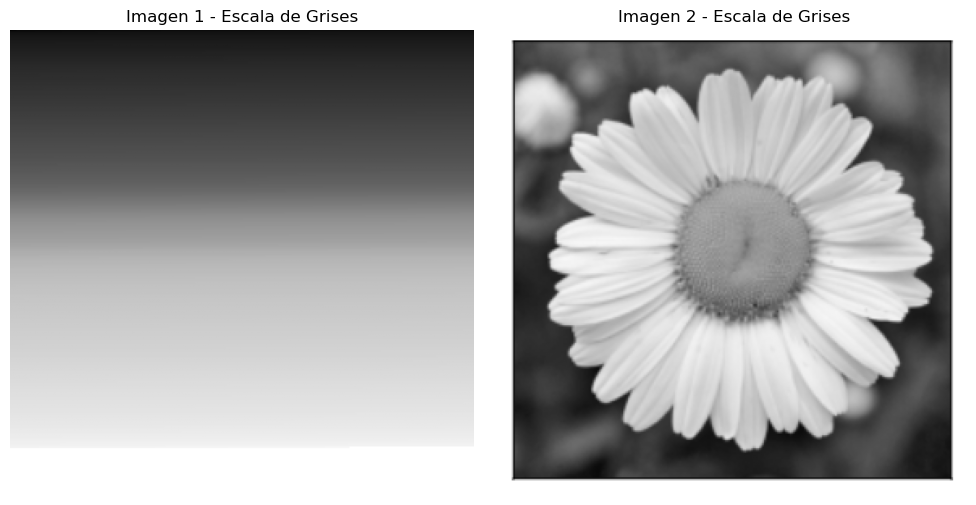

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

# Cargar las imágenes
img1_path = 'img1_tp.png'
img2_path = 'img2_tp.png'

# Leer y visualizar las imágenes en escala de grises
try:
    img1_gray = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
    img2_gray = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

    if img1_gray is None or img2_gray is None:
        raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar.")

    # Crear una figura con dos subplots para mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Visualizar la primera imagen
    axes[0].imshow(img1_gray, cmap='gray')
    axes[0].set_title('Imagen 1 - Escala de Grises')
    axes[0].axis('off')

    # Visualizar la segunda imagen
    axes[1].imshow(img2_gray, cmap='gray')
    axes[1].set_title('Imagen 2 - Escala de Grises')
    axes[1].axis('off')
    
    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)
    print(f"Verifica que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")
    print(f"Asegúrate de que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")

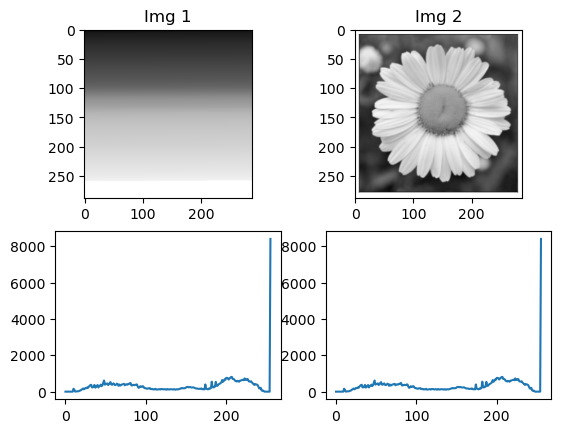

In [3]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Img 1')

hist1,bins1 = np.histogram(img1_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
ax2=plt.subplot(222)
ax2.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Img 2')

hist2,bins2 = np.histogram(img2_gray.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

#

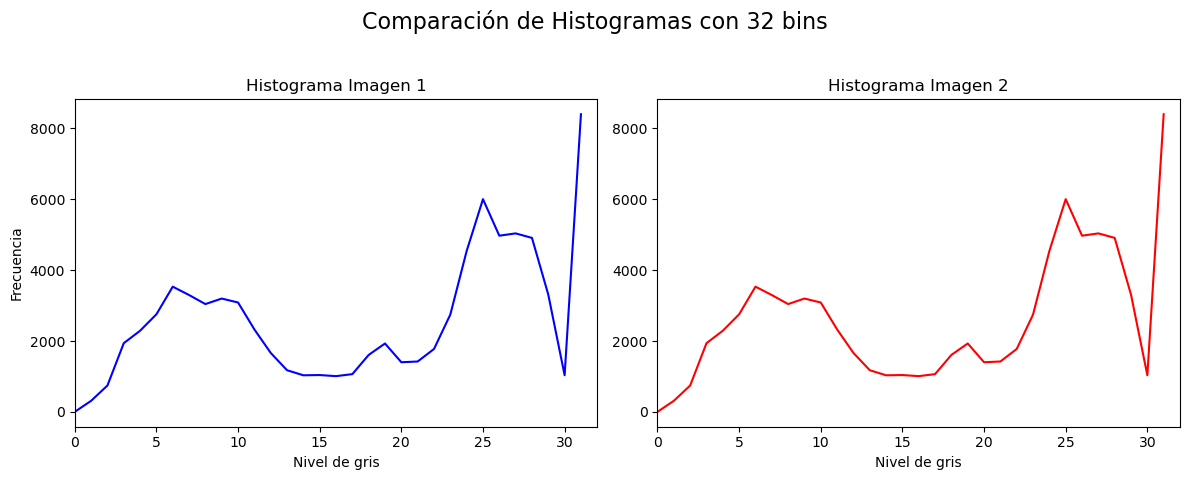

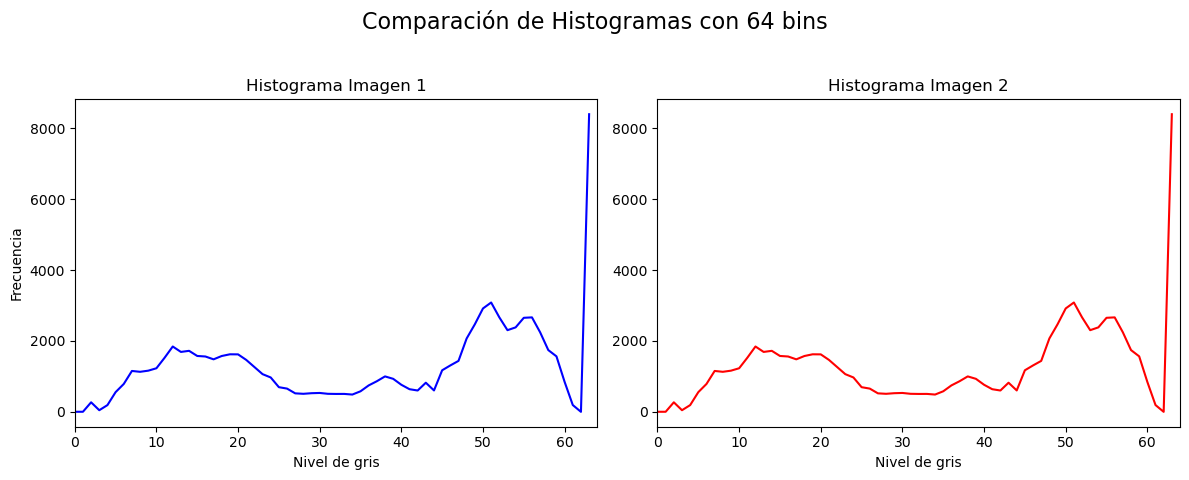

In [4]:
bin_options = [32, 64]

# Probando diferntes bins
for bins in bin_options:
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Comparación de Histogramas con {bins} bins', fontsize=16)

    # Histograma para la Imagen 1
    plt.subplot(1, 2, 1)
    hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
    plt.plot(hist1, color='blue')
    plt.title('Histograma Imagen 1')
    plt.xlabel('Nivel de gris')
    plt.ylabel('Frecuencia')
    plt.xlim([0, bins])

    # Histograma para la Imagen 2
    plt.subplot(1, 2, 2)
    hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
    plt.plot(hist2, color='red')
    plt.title('Histograma Imagen 2')
    plt.xlabel('Nivel de gris')
    plt.xlim([0, bins])

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Parte 2 – Histogramas de Imágenes en Escala de Grises

## Elección de número de bins
Se probaron histogramas con **32** y **64 bins**:  
- Con **32 bins** se obtiene una visión más general de la distribución de intensidades.  
- Con **64 bins** se logra mayor detalle sin llegar a la granularidad excesiva de 256 bins.  

---

## Observaciones de la comparación de histogramas

- **Imagen 1 (gradiente):**  
  El histograma es casi **uniforme**, ya que la imagen contiene un gradiente que abarca todos los niveles de gris de manera progresiva. Esto refleja la naturaleza sintética de la imagen, donde cada nivel aparece con frecuencias similares.

- **Imagen 2 (margarita):**  
  El histograma es claramente **bimodal**:  
  - Un pico en intensidades **altas** (pétalos blancos).  
  - Un pico en intensidades **bajas** (fondo y centro oscuro).  
  - Escasa presencia en los niveles intermedios.  
  Esto refleja una imagen natural con regiones claras y oscuras bien diferenciadas.

- **Comparación entre imágenes:**  
  Mientras que *img1* distribuye los píxeles de manera más uniforme en todo el rango de intensidades, *img2* concentra la mayor parte en los extremos (oscuros y claros).  
  Esta diferencia se observa claramente en los histogramas comparativos:  
  - Con **32 bins** se aprecia la distinción global (curva casi plana en *img1* frente a forma bimodal en *img2*).  
  - Con **64 bins** la diferencia se vuelve aún más evidente, ya que se destacan con mayor precisión los picos de *img2* en los extremos.

---

## Utilidad de los histogramas como *features*

- **Sí son útiles** como representación global:  
  - Capturan información sobre **brillo, contraste y textura general**.  
  - Permiten distinguir escenas con distribuciones de intensidades diferentes (ej. día/noche, radiografías con distintos contrastes, imágenes sintéticas vs. naturales).

- **Limitaciones:**  
  - No capturan información **espacial** (ubicación de los píxeles de cada intensidad).  
  - Son sensibles a variaciones de **iluminación y exposición**.  

- **Buenas prácticas para usarlos en ML:**  
  - Normalizar los histogramas (ej. L1 → suma = 1) para compararlos entre imágenes de distinto tamaño.  
  - Dividir la imagen en **bloques** (ej. 2×2) y concatenar los histogramas para añadir información espacial.  
  - Complementar con otros descriptores como **LBP/GLCM** (textura), **HOG** (forma), o emplear **CNNs** que aprenden *features* automáticamente.  
  - Para comparar histogramas, usar métricas como **Bhattacharyya**, **χ²** o **intersección**.

---

## Conclusión
Los histogramas de intensidades en escala de grises son un **feature simple pero informativo** que resulta útil en tareas de clasificación o detección básicas.  
No obstante, para problemas más complejos es recomendable combinarlos con métodos que capturen información local y espacial.


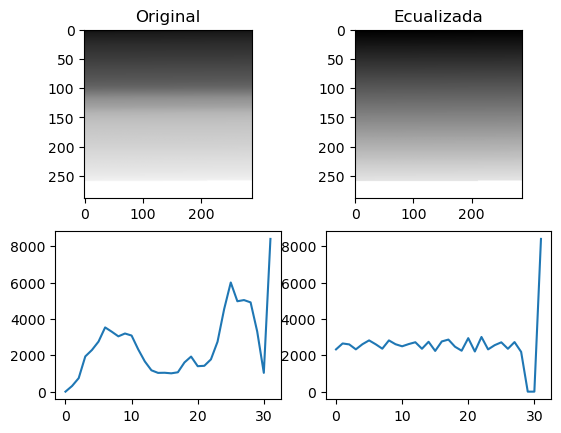

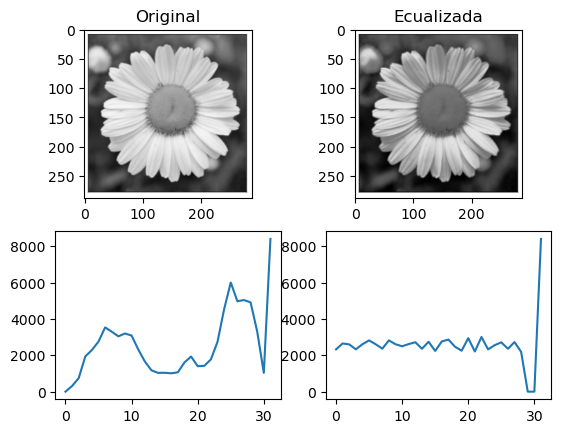

In [5]:
# Nueva figura
bins= 32
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img1_gray.ravel(),bins,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
img_eqzd = cv.equalizeHist(img1_gray)
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),bins,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)


# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img2_gray.ravel(),bins,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
img_eqzd = cv.equalizeHist(img2_gray)
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),bins,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

plt.show()





C:\Users\erlin\AppData\Local\Temp\ipykernel_3948\1002597493.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\erlin\AppData\Local\Temp\ipykernel_3948\1002597493.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


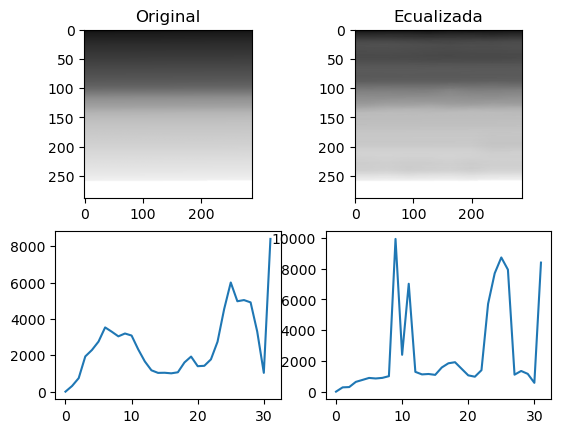

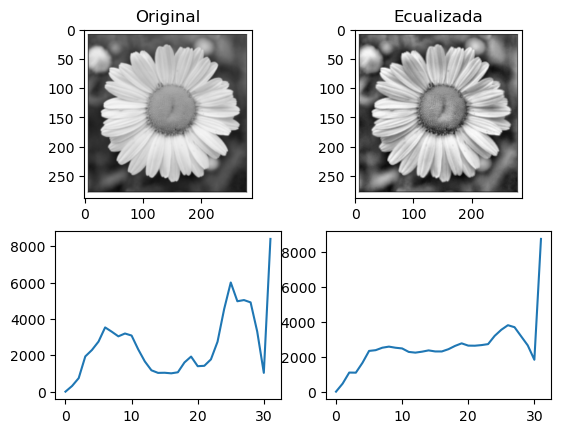

In [32]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img1_gray.ravel(),bins,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_eqzd = clahe.apply(img1_gray)
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),bins,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

fig.show()

# Mostrar las imagenes lado a lado usando cv2.hconcat
#out1 = cv.hconcat([img, img_eqzd])
#cv.imshow('Clahe', out1)

# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img2_gray.ravel(),bins,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_eqzd = clahe.apply(img2_gray)
ax2=plt.subplot(222)
ax2.imshow(img_eqzd, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img_eqzd.ravel(),bins,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

fig.show()

# Mostrar las imagenes lado a lado usando cv2.hconcat
#out1 = cv.hconcat([img, img_eqzd])
#cv.imshow('Clahe', out1)